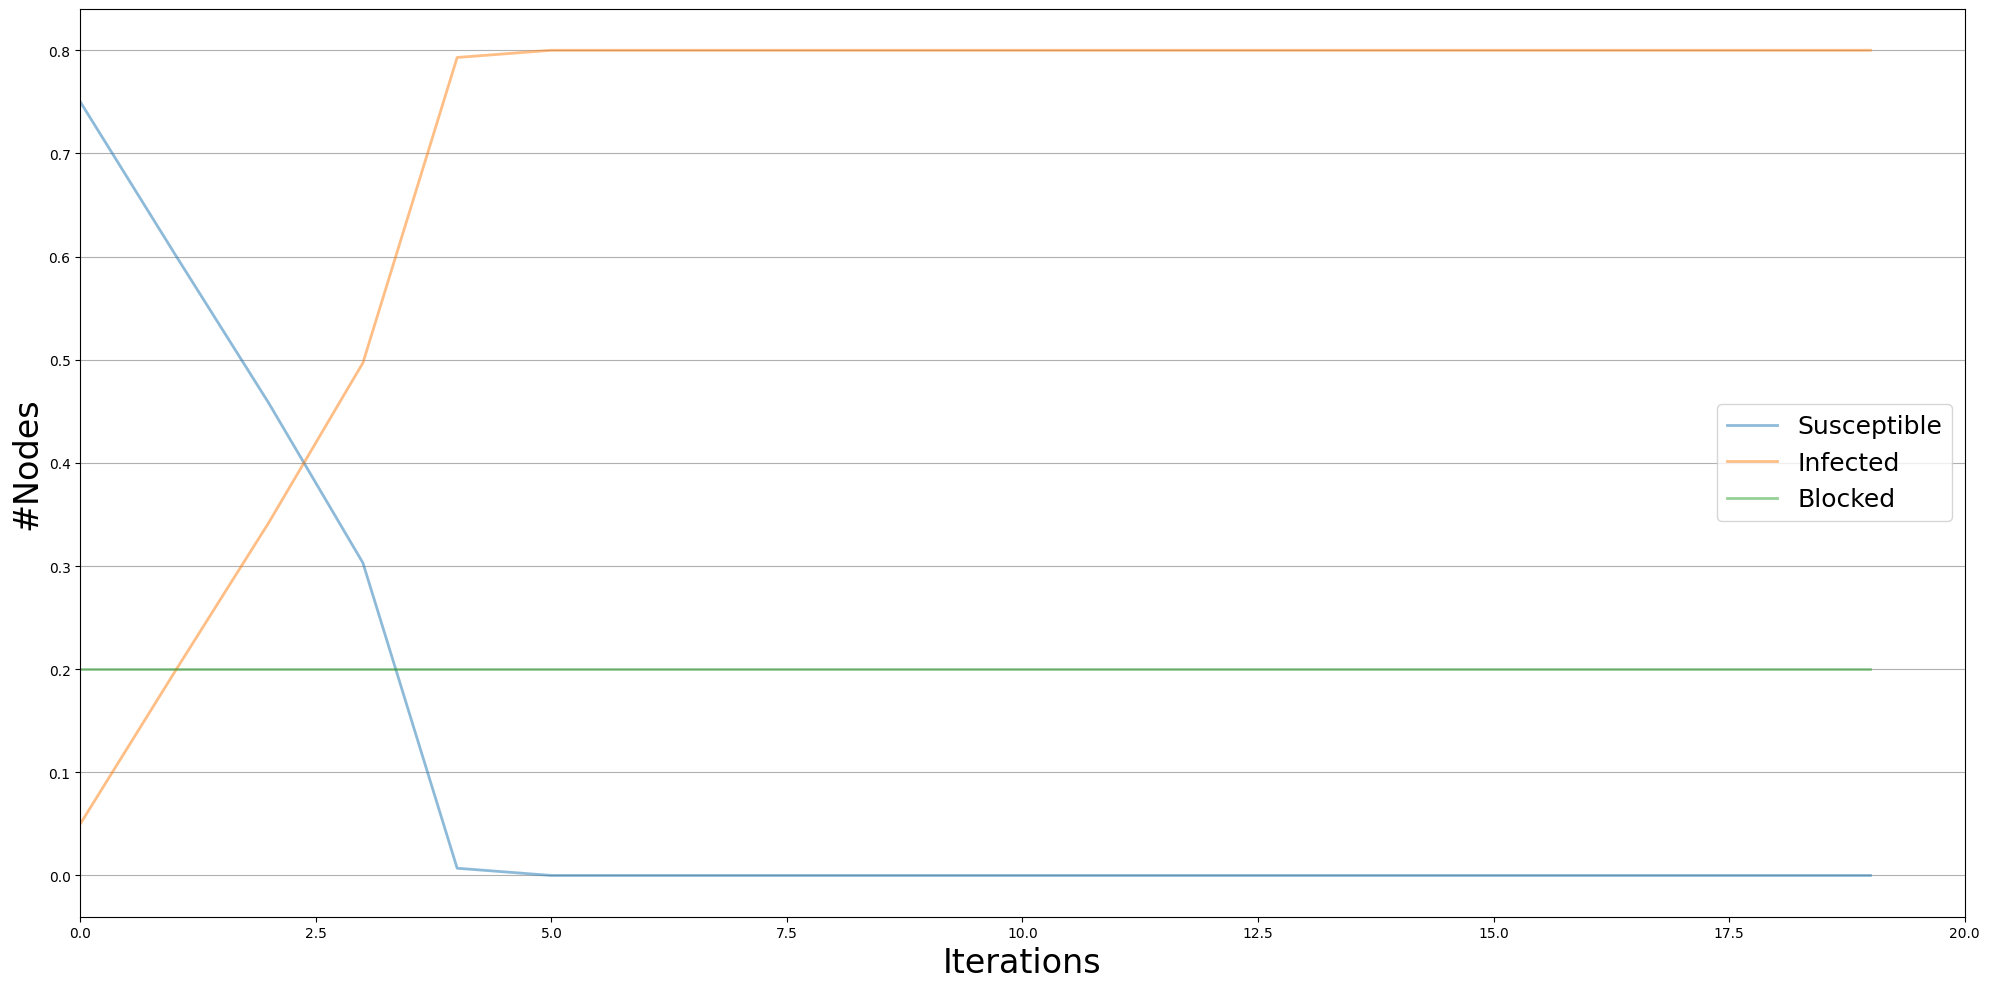

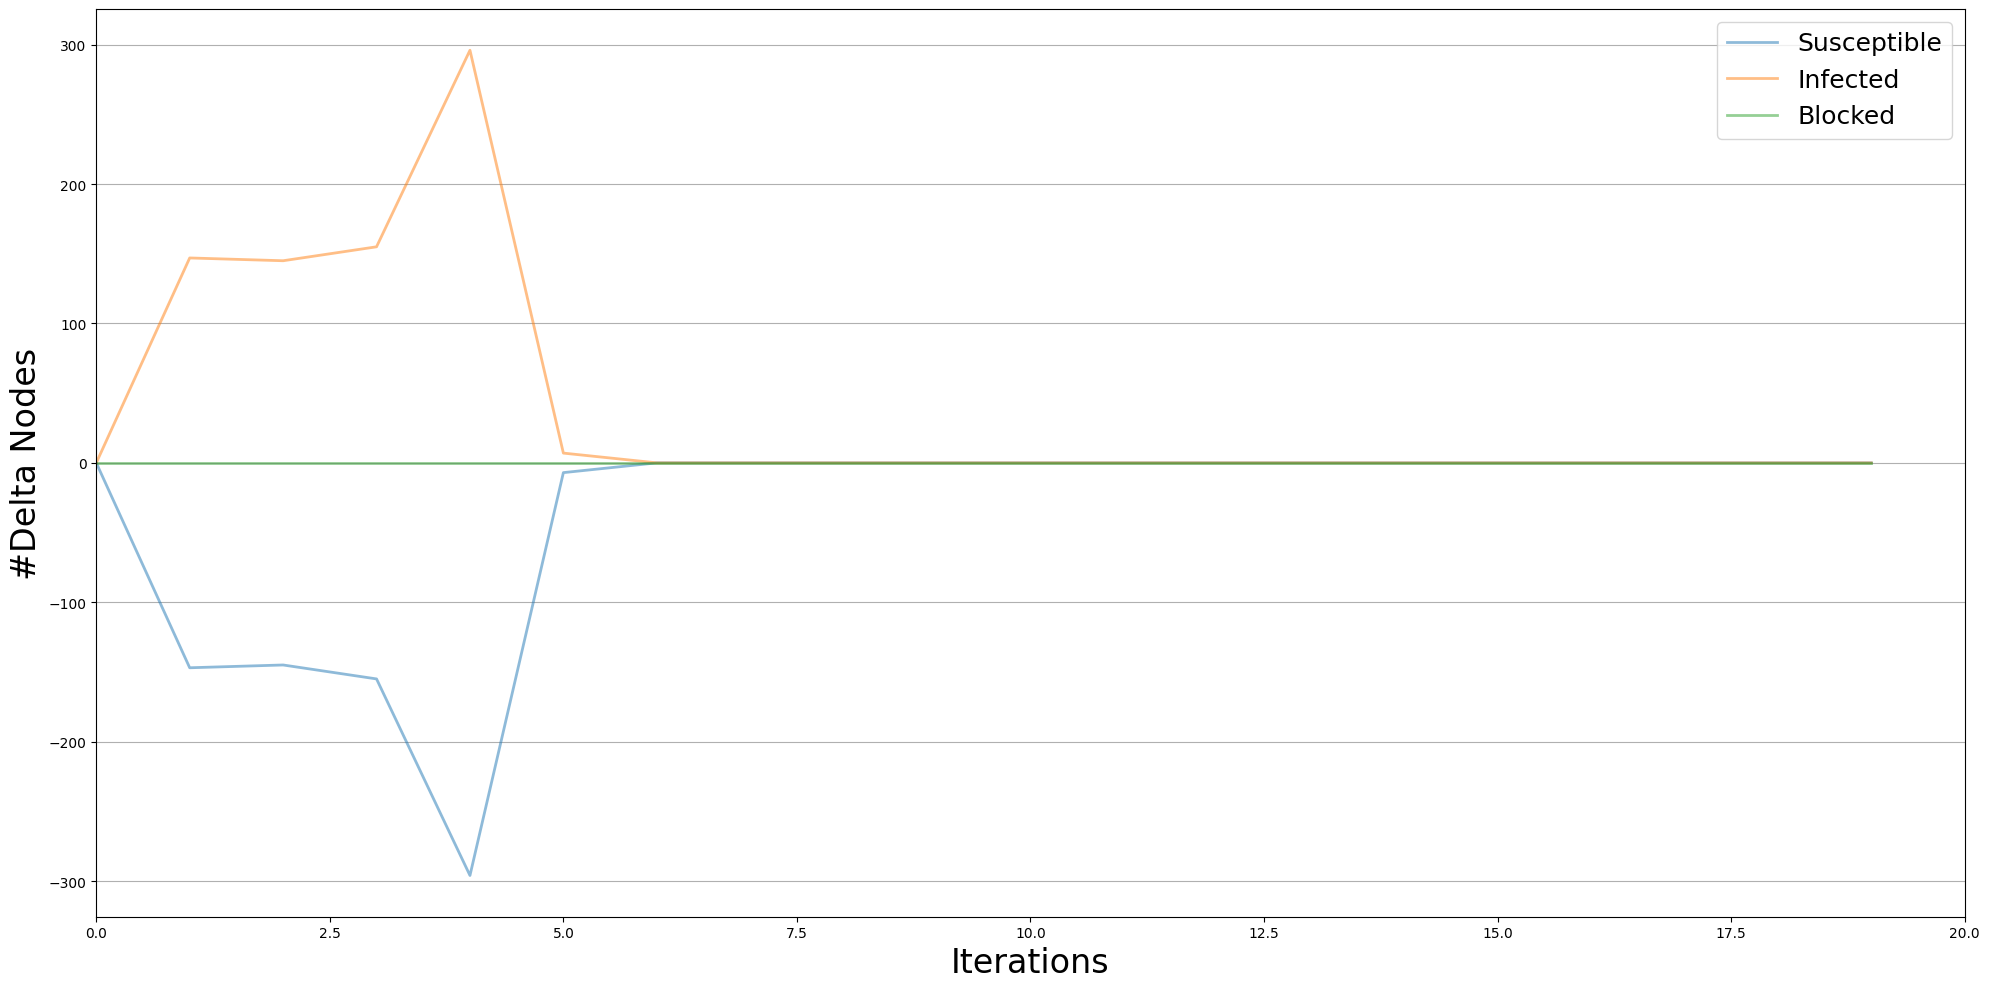

In [11]:
'''
The authors extend the classical model introducing a density r of blocked nodes – nodes which are immune to 
social influence – and a probability of spontaneous adoption p to capture external influence.

Thus, the model distinguishes three kinds of node: Blocked (B), Susceptible (S) and Adoptiong (A). 
The latter class breaks into two categories: vulnerable and stable nodes. A node can adopt either under its 
neighbors’ influence, or spontaneously, due to endogenous effects.

Statuses:
- S: Susceptible | 0 - not yet infected nodes that can be infected by their infected neighbors if they reach the threshold
- I: Infected | 1 - infected nodes that can infect their susceptible neighbors
- B: Blocked | -1 - nodes that were infected but are now blocked and cannot be infected again, they cannot infect their neighbors

Parameters:
- adoption_rate: Exogenous adoption rate
- percentage_blocked: Percentage of blocked nodes
- threshold: Number of neighbors needed to infect a susceptible node

Initial status:
- fraction_infected: Fraction of infected nodes at the beginning of the simulation
- initial_infected: seed of infected nodes
- percentage_blocked: Percentage of blocked nodes
- blocked_nodes: set of blocked nodes

Fase iniziale: All'inizio della simulazione, ci sono solo nodi suscettibili e un piccolo numero di nodi infetti. 
Il numero di nodi infetti aumenta rapidamente man mano che la malattia si diffonde nella rete.

Fase epidemica: Quando il numero di nodi infetti raggiunge un picco, si verifica una fase epidemica. 
Durante questa fase, la malattia si diffonde rapidamente nella rete e il numero di nodi suscettibili diminuisce rapidamente.

Fase endemica: Man mano che sempre più nodi diventano bloccati, il tasso di contagio diminuisce e il  numero di nodi infetti 
inizia a diminuire. La rete raggiunge infine una fase endemica, in cui il numero di nodi infetti si stabilizza a un livello costante.
'''

import networkx as nx
import ndlib.models.ModelConfig as mc
import ndlib.models.epidemics as ep
from ndlib.viz.mpl.DiffusionTrend import DiffusionTrend
from ndlib.viz.mpl.DiffusionPrevalence import DiffusionPrevalence
import json


# Network topology
g = nx.erdos_renyi_graph(1000, 0.1)

# Model selection
model = ep.KerteszThresholdModel(g)

# Model Configuration
config = mc.Configuration()
config.add_model_parameter('adopter_rate', 0.2) #spontaneous adoption rate, higher values mean more fast adoption
config.add_model_parameter('percentage_blocked', 0.2) #percentage of blocked nodes
config.add_model_parameter('fraction_infected', 0.05) #fraction of infected nodes at the beginning of the simulation

# Setting node parameters
threshold = 0.40 #number of neighbors needed to infect a susceptible node
for i in g.nodes():
    config.add_node_configuration("threshold", i, threshold)

model.set_initial_status(config)

# Simulation execution
iterations = model.iteration_bunch(20)
trends = model.build_trends(iterations)

%matplotlib inline
viz = DiffusionTrend(model, trends)
viz.plot()
viz = DiffusionPrevalence(model, trends)
viz.plot()

